In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

Text(0, 0.5, 'Y dataset')

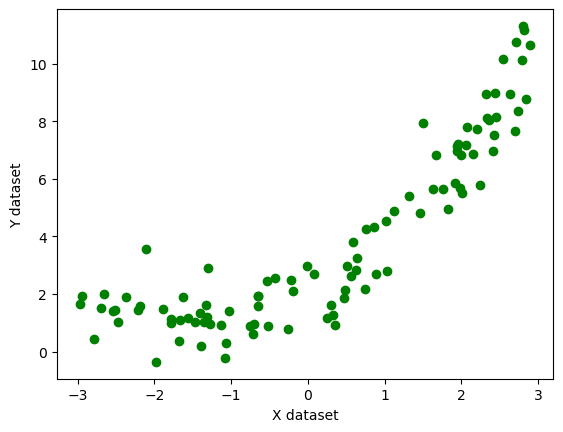

In [2]:
# To create dataset we use this code 
X = 6 * np.random.rand(100, 1) - 3
y =0.5 * X**2 + 1.5*X + 2 + np.random.randn(100, 1)

# quadratic equation used - y= 0.5*(x^2) + 1.5*x + 2 + outliers 
plt.scatter(X,y,color='g')
plt.xlabel('X dataset')
plt.ylabel('Y dataset')

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# train the model
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [5]:
# use test data and predict 
y_pred=regression.predict(X_test)

In [6]:
from sklearn.metrics import r2_score
score=r2_score(y_test, y_pred)
score

0.739660755374843

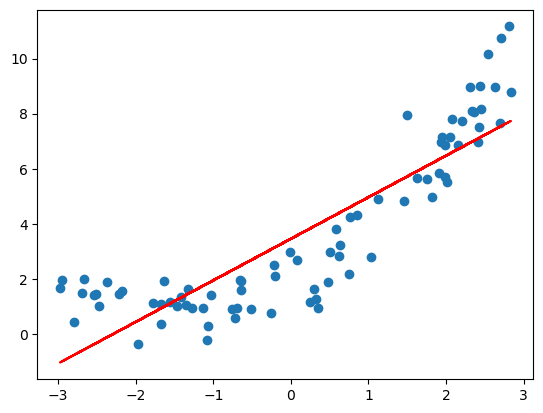

In [7]:
# lets visulize the model : Visualize training fit
plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train), color='r') # plt.plot() connects these predicted points with a line

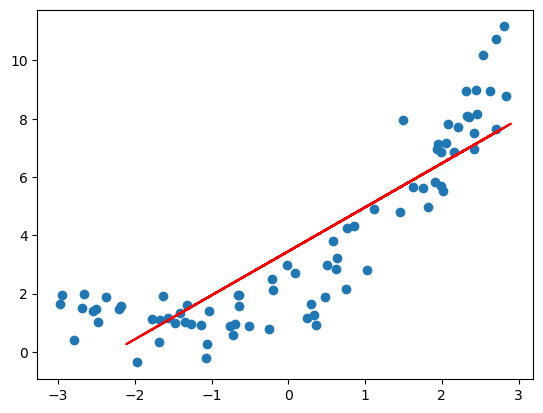

In [8]:
# Visualize test predictions : How my trained model generalizes to unseen data. 
plt.scatter(X_train, y_train)
plt.plot(X_test, regression.predict(X_test), color='r')

In [9]:
# now lets apply polynomial transformation 
from sklearn.preprocessing import PolynomialFeatures

In [10]:
poly=PolynomialFeatures(include_bias=False, degree=2) # y= θ1​ * x + θ2 * ​x2 intercept will be added in model training by linear reg.

Even in polynomial regression, include_bias should usually be set to False because LinearRegression already learns the intercept. We only set it to True when the model does not include an intercept or when we want an explicit bias column.  

include_bias adds a column of ones to represent the intercept term in the polynomial feature matrix. It should be set to False when using models like LinearRegression that already include an intercept.

In [11]:
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

In [12]:
X_train_poly

array([[-6.51458266e-01,  4.24397872e-01],
       [ 4.75067480e-01,  2.25689111e-01],
       [-1.27423750e+00,  1.62368121e+00],
       [ 5.07575967e-01,  2.57633363e-01],
       [-7.21720719e-01,  5.20880796e-01],
       [ 2.53836806e+00,  6.44331242e+00],
       [ 5.82813165e-01,  3.39671186e-01],
       [ 2.32977396e+00,  5.42784671e+00],
       [ 3.53870785e-01,  1.25224532e-01],
       [ 1.98617467e+00,  3.94488982e+00],
       [-1.07795646e+00,  1.16199013e+00],
       [-1.47220644e+00,  2.16739181e+00],
       [ 1.94476408e+00,  3.78210734e+00],
       [ 2.83731770e+00,  8.05037175e+00],
       [ 8.58380969e-01,  7.36817887e-01],
       [ 2.70954412e+00,  7.34162932e+00],
       [ 1.49318985e+00,  2.22961593e+00],
       [ 6.36176576e-01,  4.04720636e-01],
       [-1.41351246e+00,  1.99801747e+00],
       [-1.63474263e+00,  2.67238346e+00],
       [-2.47880604e+00,  6.14447940e+00],
       [-6.97781899e-01,  4.86899579e-01],
       [ 1.62787036e+00,  2.64996191e+00],
       [-1.

In [13]:
X_test_poly

array([[-1.39331069,  1.94131469],
       [-1.2969846 ,  1.68216905],
       [ 0.48144894,  0.23179308],
       [ 2.8990749 ,  8.40463527],
       [-1.31474871,  1.72856418],
       [-0.53946029,  0.2910174 ],
       [ 1.66918864,  2.7861907 ],
       [ 1.31994725,  1.74226074],
       [ 1.95321958,  3.81506673],
       [ 0.88625808,  0.78545339],
       [ 2.23587653,  4.99914384],
       [ 2.73869302,  7.50043947],
       [ 0.56007912,  0.31368862],
       [-0.4316871 ,  0.18635376],
       [ 1.01462407,  1.02946201],
       [ 2.78223551,  7.74083444],
       [-1.88734281,  3.56206287],
       [ 2.79591477,  7.81713942],
       [-2.11397284,  4.46888116],
       [-1.77963546,  3.16710237]])

In [14]:
# now train the model 
regression.fit(X_train_poly, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [15]:
# do predictions on test data
y_pred=regression.predict(X_test_poly) 

In [16]:
# compute r2 score
score=r2_score(y_test, y_pred)
score

0.8854491962866557

In [17]:
print(regression.coef_) 
print(regression.intercept_)

[[1.44400412 0.48473085]]
[1.92988351]


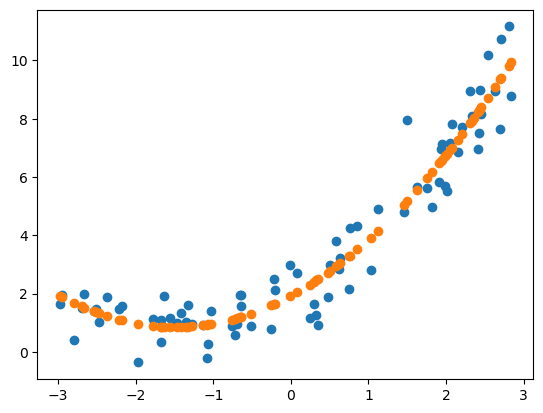

In [18]:
# currently we are seeing how our model is getting trained on train dataset 
plt.scatter(X_train, y_train)
plt.scatter(X_train, regression.predict(X_train_poly))

In [19]:
poly=PolynomialFeatures(degree=3, include_bias=False)

In [20]:
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

In [21]:
X_train_poly

array([[-6.51458266e-01,  4.24397872e-01, -2.76477502e-01],
       [ 4.75067480e-01,  2.25689111e-01,  1.07217557e-01],
       [-1.27423750e+00,  1.62368121e+00, -2.06895548e+00],
       [ 5.07575967e-01,  2.57633363e-01,  1.30768503e-01],
       [-7.21720719e-01,  5.20880796e-01, -3.75930462e-01],
       [ 2.53836806e+00,  6.44331242e+00,  1.63554985e+01],
       [ 5.82813165e-01,  3.39671186e-01,  1.97964839e-01],
       [ 2.32977396e+00,  5.42784671e+00,  1.26456559e+01],
       [ 3.53870785e-01,  1.25224532e-01,  4.43133036e-02],
       [ 1.98617467e+00,  3.94488982e+00,  7.83524025e+00],
       [-1.07795646e+00,  1.16199013e+00, -1.25257476e+00],
       [-1.47220644e+00,  2.16739181e+00, -3.19084819e+00],
       [ 1.94476408e+00,  3.78210734e+00,  7.35530651e+00],
       [ 2.83731770e+00,  8.05037175e+00,  2.28414623e+01],
       [ 8.58380969e-01,  7.36817887e-01,  6.32470452e-01],
       [ 2.70954412e+00,  7.34162932e+00,  1.98924685e+01],
       [ 1.49318985e+00,  2.22961593e+00

In [22]:
X_test_poly

array([[-1.39331069,  1.94131469, -2.70485451],
       [-1.2969846 ,  1.68216905, -2.18174735],
       [ 0.48144894,  0.23179308,  0.11159653],
       [ 2.8990749 ,  8.40463527, 24.36566716],
       [-1.31474871,  1.72856418, -2.27262754],
       [-0.53946029,  0.2910174 , -0.15699233],
       [ 1.66918864,  2.7861907 ,  4.65067786],
       [ 1.31994725,  1.74226074,  2.29969227],
       [ 1.95321958,  3.81506673,  7.45166303],
       [ 0.88625808,  0.78545339,  0.69611441],
       [ 2.23587653,  4.99914384, 11.17746835],
       [ 2.73869302,  7.50043947, 20.54140125],
       [ 0.56007912,  0.31368862,  0.17569045],
       [-0.4316871 ,  0.18635376, -0.08044651],
       [ 1.01462407,  1.02946201,  1.04451693],
       [ 2.78223551,  7.74083444, 21.53682446],
       [-1.88734281,  3.56206287, -6.72283373],
       [ 2.79591477,  7.81713942, 21.85605557],
       [-2.11397284,  4.46888116, -9.44709339],
       [-1.77963546,  3.16710237, -5.63628768]])

In [23]:
regression.fit(X_train_poly, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [24]:
y_pred=regression.predict(X_test_poly)

In [25]:
score=r2_score(y_test, y_pred)

In [26]:
score

0.8885981215277687

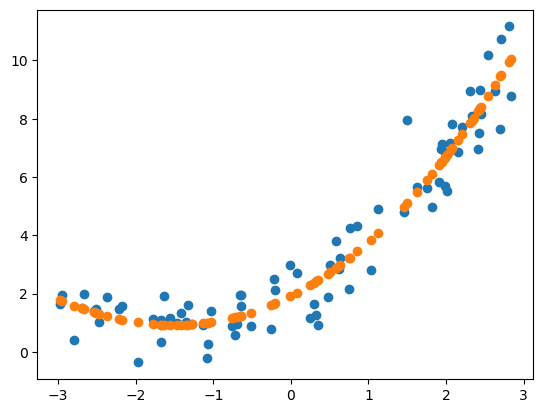

In [27]:
# currently we are seeing how our model is getting trained on train dataset 
plt.scatter(X_train, y_train)
plt.scatter(X_train, regression.predict(X_train_poly))

#### now let generate another datset and predict using our latest (degree=3) model 

In [32]:
# Prediction of new data set
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)

In [31]:
X_new_poly

array([[-3.00000000e+00,  9.00000000e+00, -2.70000000e+01],
       [-2.96984925e+00,  8.82000455e+00, -2.61940839e+01],
       [-2.93969849e+00,  8.64182723e+00, -2.54043665e+01],
       [-2.90954774e+00,  8.46546804e+00, -2.46306834e+01],
       [-2.87939698e+00,  8.29092700e+00, -2.38728702e+01],
       [-2.84924623e+00,  8.11820409e+00, -2.31307624e+01],
       [-2.81909548e+00,  7.94729931e+00, -2.24041955e+01],
       [-2.78894472e+00,  7.77821267e+00, -2.16930052e+01],
       [-2.75879397e+00,  7.61094417e+00, -2.09970269e+01],
       [-2.72864322e+00,  7.44549380e+00, -2.03160961e+01],
       [-2.69849246e+00,  7.28186157e+00, -1.96500486e+01],
       [-2.66834171e+00,  7.12004747e+00, -1.89987196e+01],
       [-2.63819095e+00,  6.96005151e+00, -1.83619449e+01],
       [-2.60804020e+00,  6.80187369e+00, -1.77395600e+01],
       [-2.57788945e+00,  6.64551400e+00, -1.71314004e+01],
       [-2.54773869e+00,  6.49097245e+00, -1.65373017e+01],
       [-2.51758794e+00,  6.33824903e+00

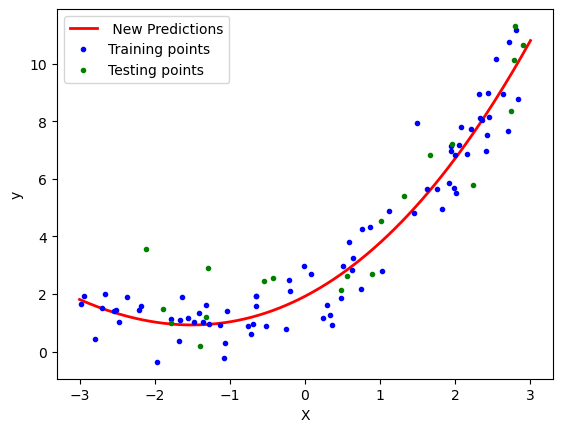

In [30]:
# predict the output of new dataset 
y_new = regression.predict(X_new_poly)

# plot 
plt.plot(X_new, y_new, "r-", linewidth=2, label=" New Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# so it's now completed and it is learning project and now i learned the polynomial regression with hands on practise